# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [2]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

# Увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 14,12

# Отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [5]:
url='http://yustiks.ru/housing.csv'
s=requests.get(url).content
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data_h=pd.read_csv(io.StringIO(s.decode('utf-8')),  delim_whitespace=True, names=names)
data_h.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



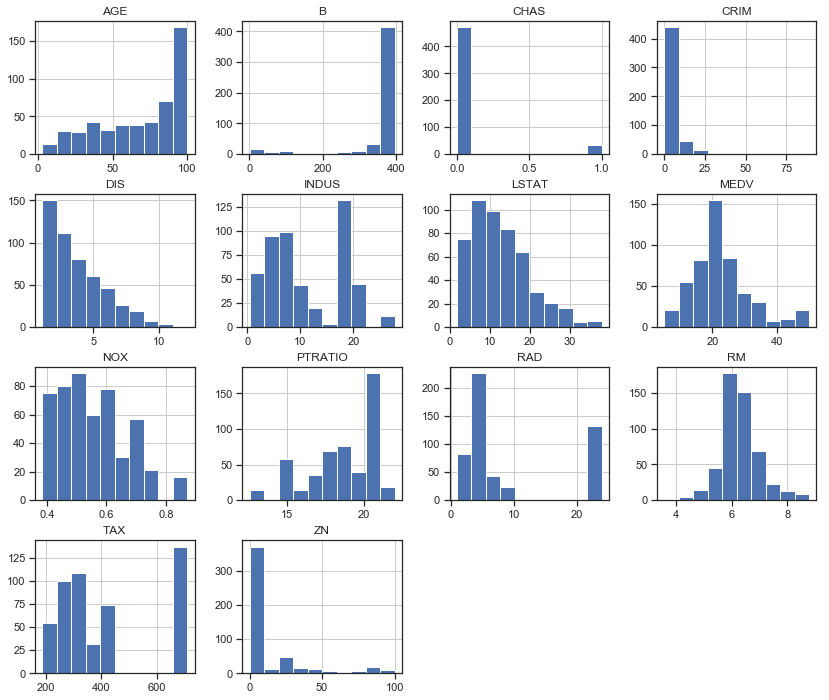

In [95]:
data_h.hist(column=[
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 
    'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 
    'B', 'LSTAT', 'MEDV'], bins=10)

plt.show()

In [90]:
# Можно сделать вывод, что присутствуют распределения похожие на: 

# 'CRIM' - 
# 'ZN' - 
# 'INDUS' - 
# 'CHAS' - Бернулли
# 'NOX' - 
# 'RM' - Стьюдентса / Нормальное
# 'AGE' - Логнормальное
# 'DIS' - Геометрическое
# 'RAD' - 
# 'TAX' - 
# 'PTRATIO' - 
# 'B' - 
# 'LSTAT' - Логнормальное
# 'MEDV' - Нормальное

In [6]:
# Напишите код, который будет рисовать распределения попарно - точечные распределение
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df_w=pd.read_csv(url)

data_drop = df_w.dropna()

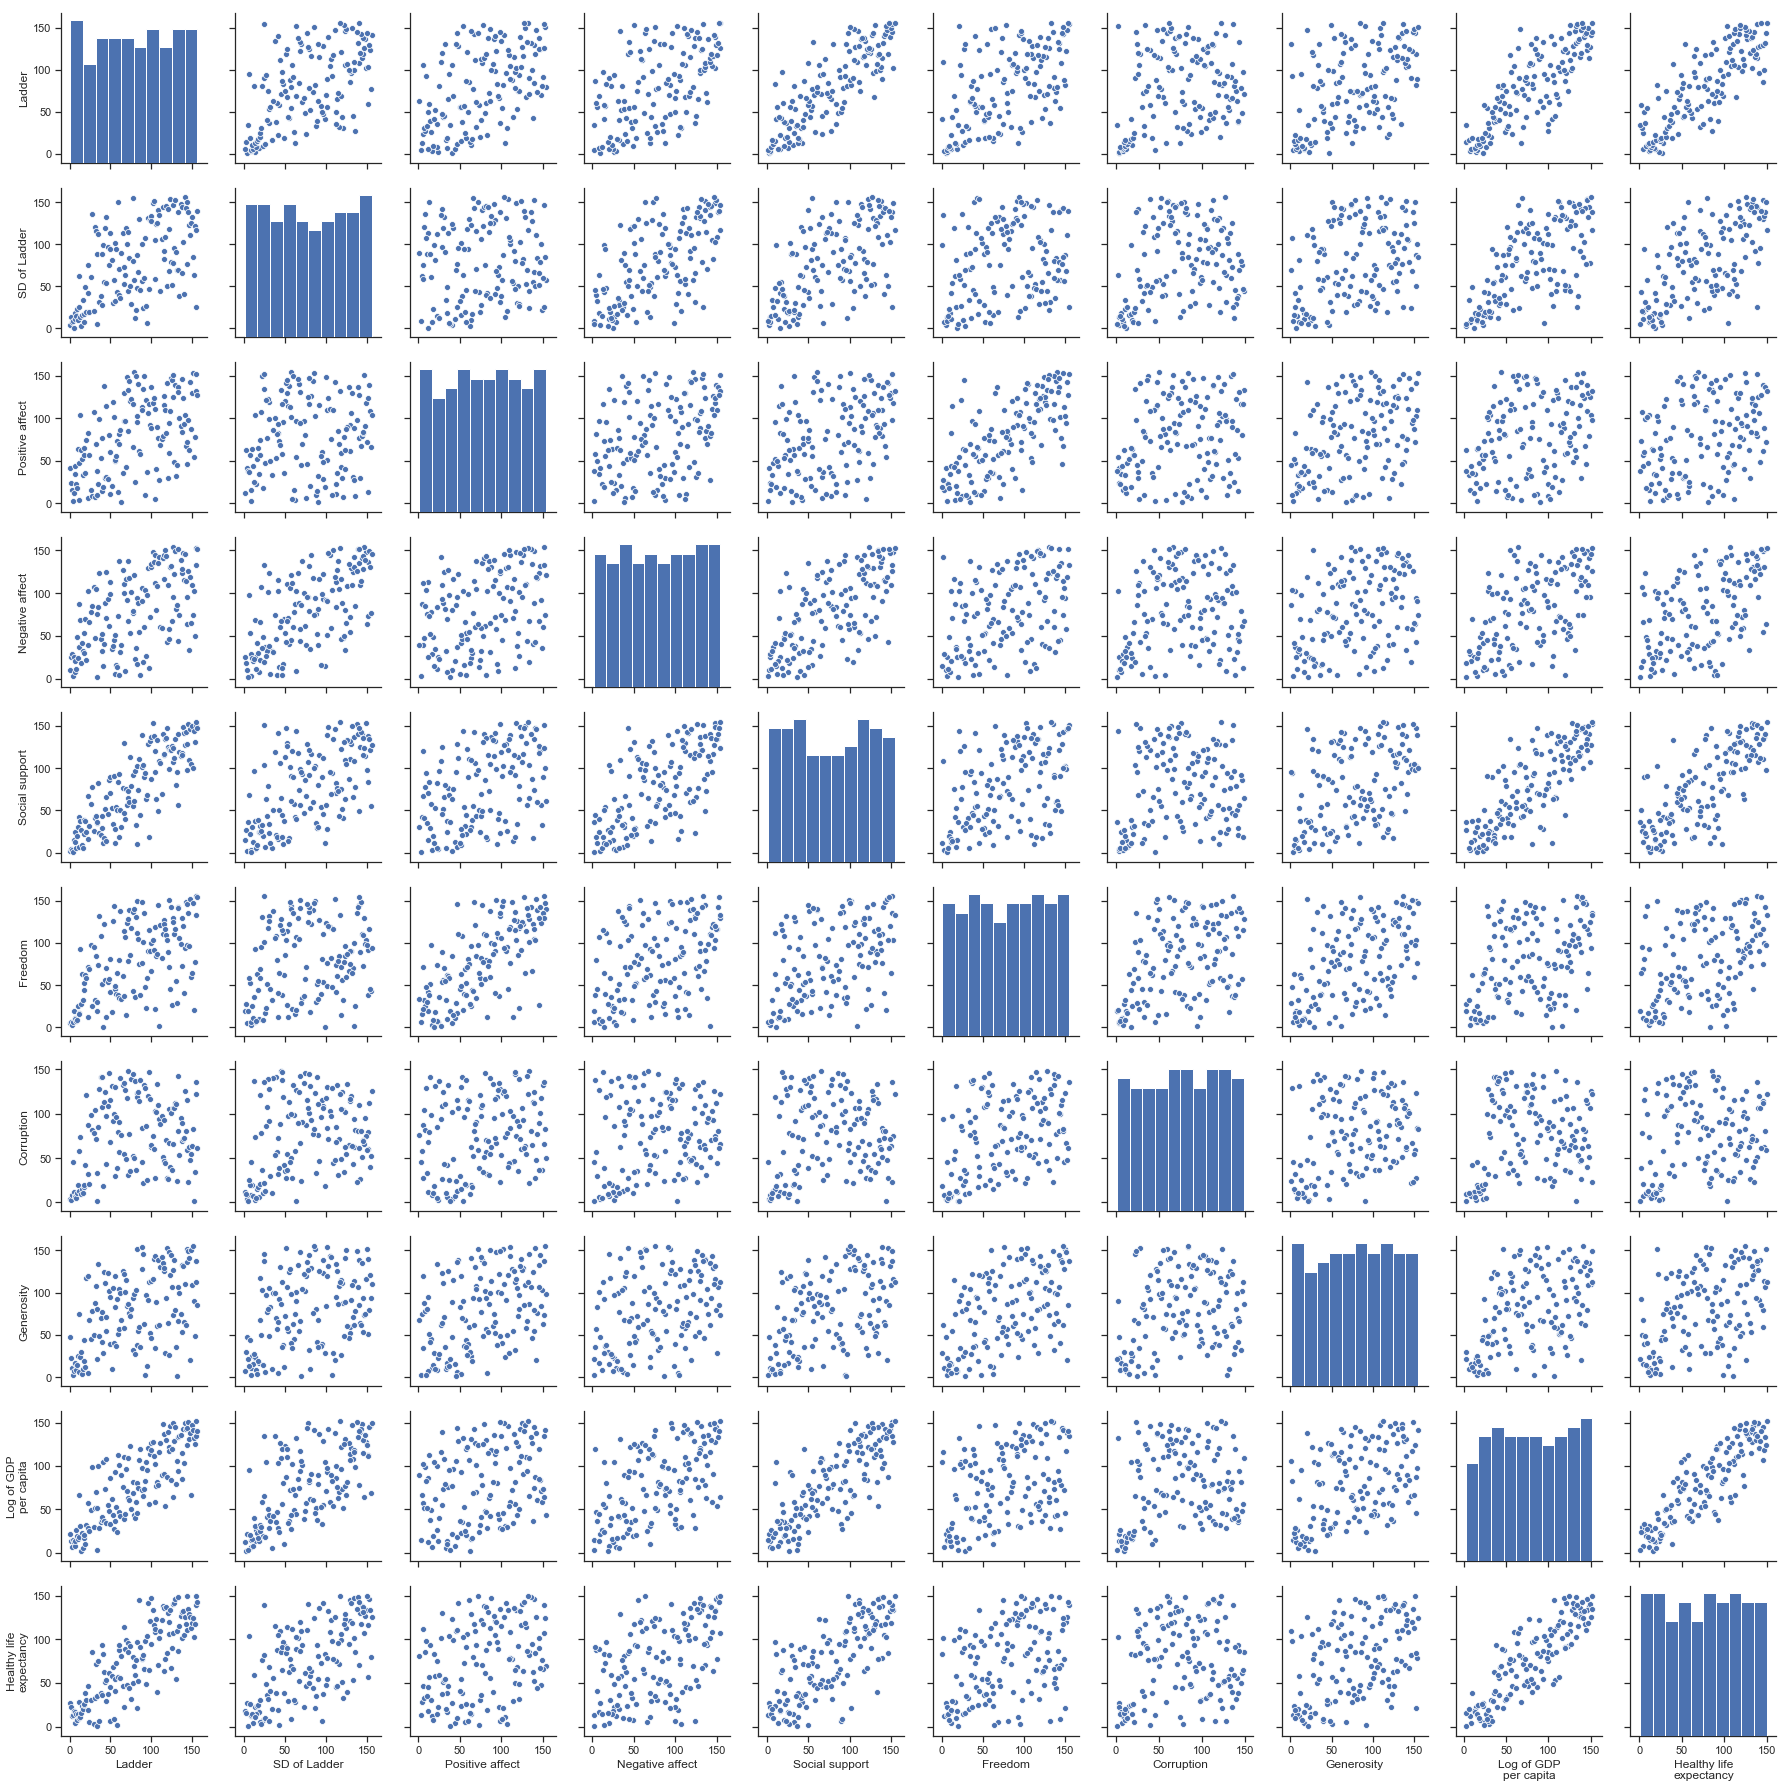

In [244]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data_drop)

Загрузить таблицу Happiness report. Нарисовать матрицу ковариаций попарно. 

In [7]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop). Написать код.

In [8]:
# Посмотрим на "Выбросы"
df_s = data.isnull().sum()
print(df_s)

print("\nСколько в данной таблице отсутствующих значений? \nОтвет: {}".format(data.shape))
print("\nИтого пустых значений в выборке ('Выбросы') \nОтвет: {}".format(df_s.sum()))
print('\nЕсли есть отсутствующие значения в выборке country? \nОтвет: нет')

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

Сколько в данной таблице отсутствующих значений? 
Ответ: (156, 11)

Итого пустых значений в выборке ('Выбросы') 
Ответ: 23

Если есть отсутствующие значения в выборке country? 
Ответ: нет


Сколько стран в выборке? Написать ответ. Можно ли сказать, что данные значения - это **проблема классификации**?

In [106]:
print(data['Country (region)'].value_counts().head(10))
print("\nСколько стран в выборке? \nОтвет: {}".format(data['Country (region)'].count()))
print("\nМожно ли сказать, что данные значения - это проблема классификации? \nОтвет: можно")

Turkey        1
Montenegro    1
Cambodia      1
Laos          1
Ecuador       1
Kenya         1
Iraq          1
Madagascar    1
Botswana      1
Bangladesh    1
Name: Country (region), dtype: int64

Сколько стран в выборке? 
Ответ: 156

Можно ли сказать, что данные значения - это проблема классификации? 
Ответ: можно


Нарисовать sns.pairplot для класс - страна. Из графика сделать вывод о том, какие страны похожи.

In [9]:
# Удалим пустые значения чтобы построить pairplot
data_d = data.dropna()

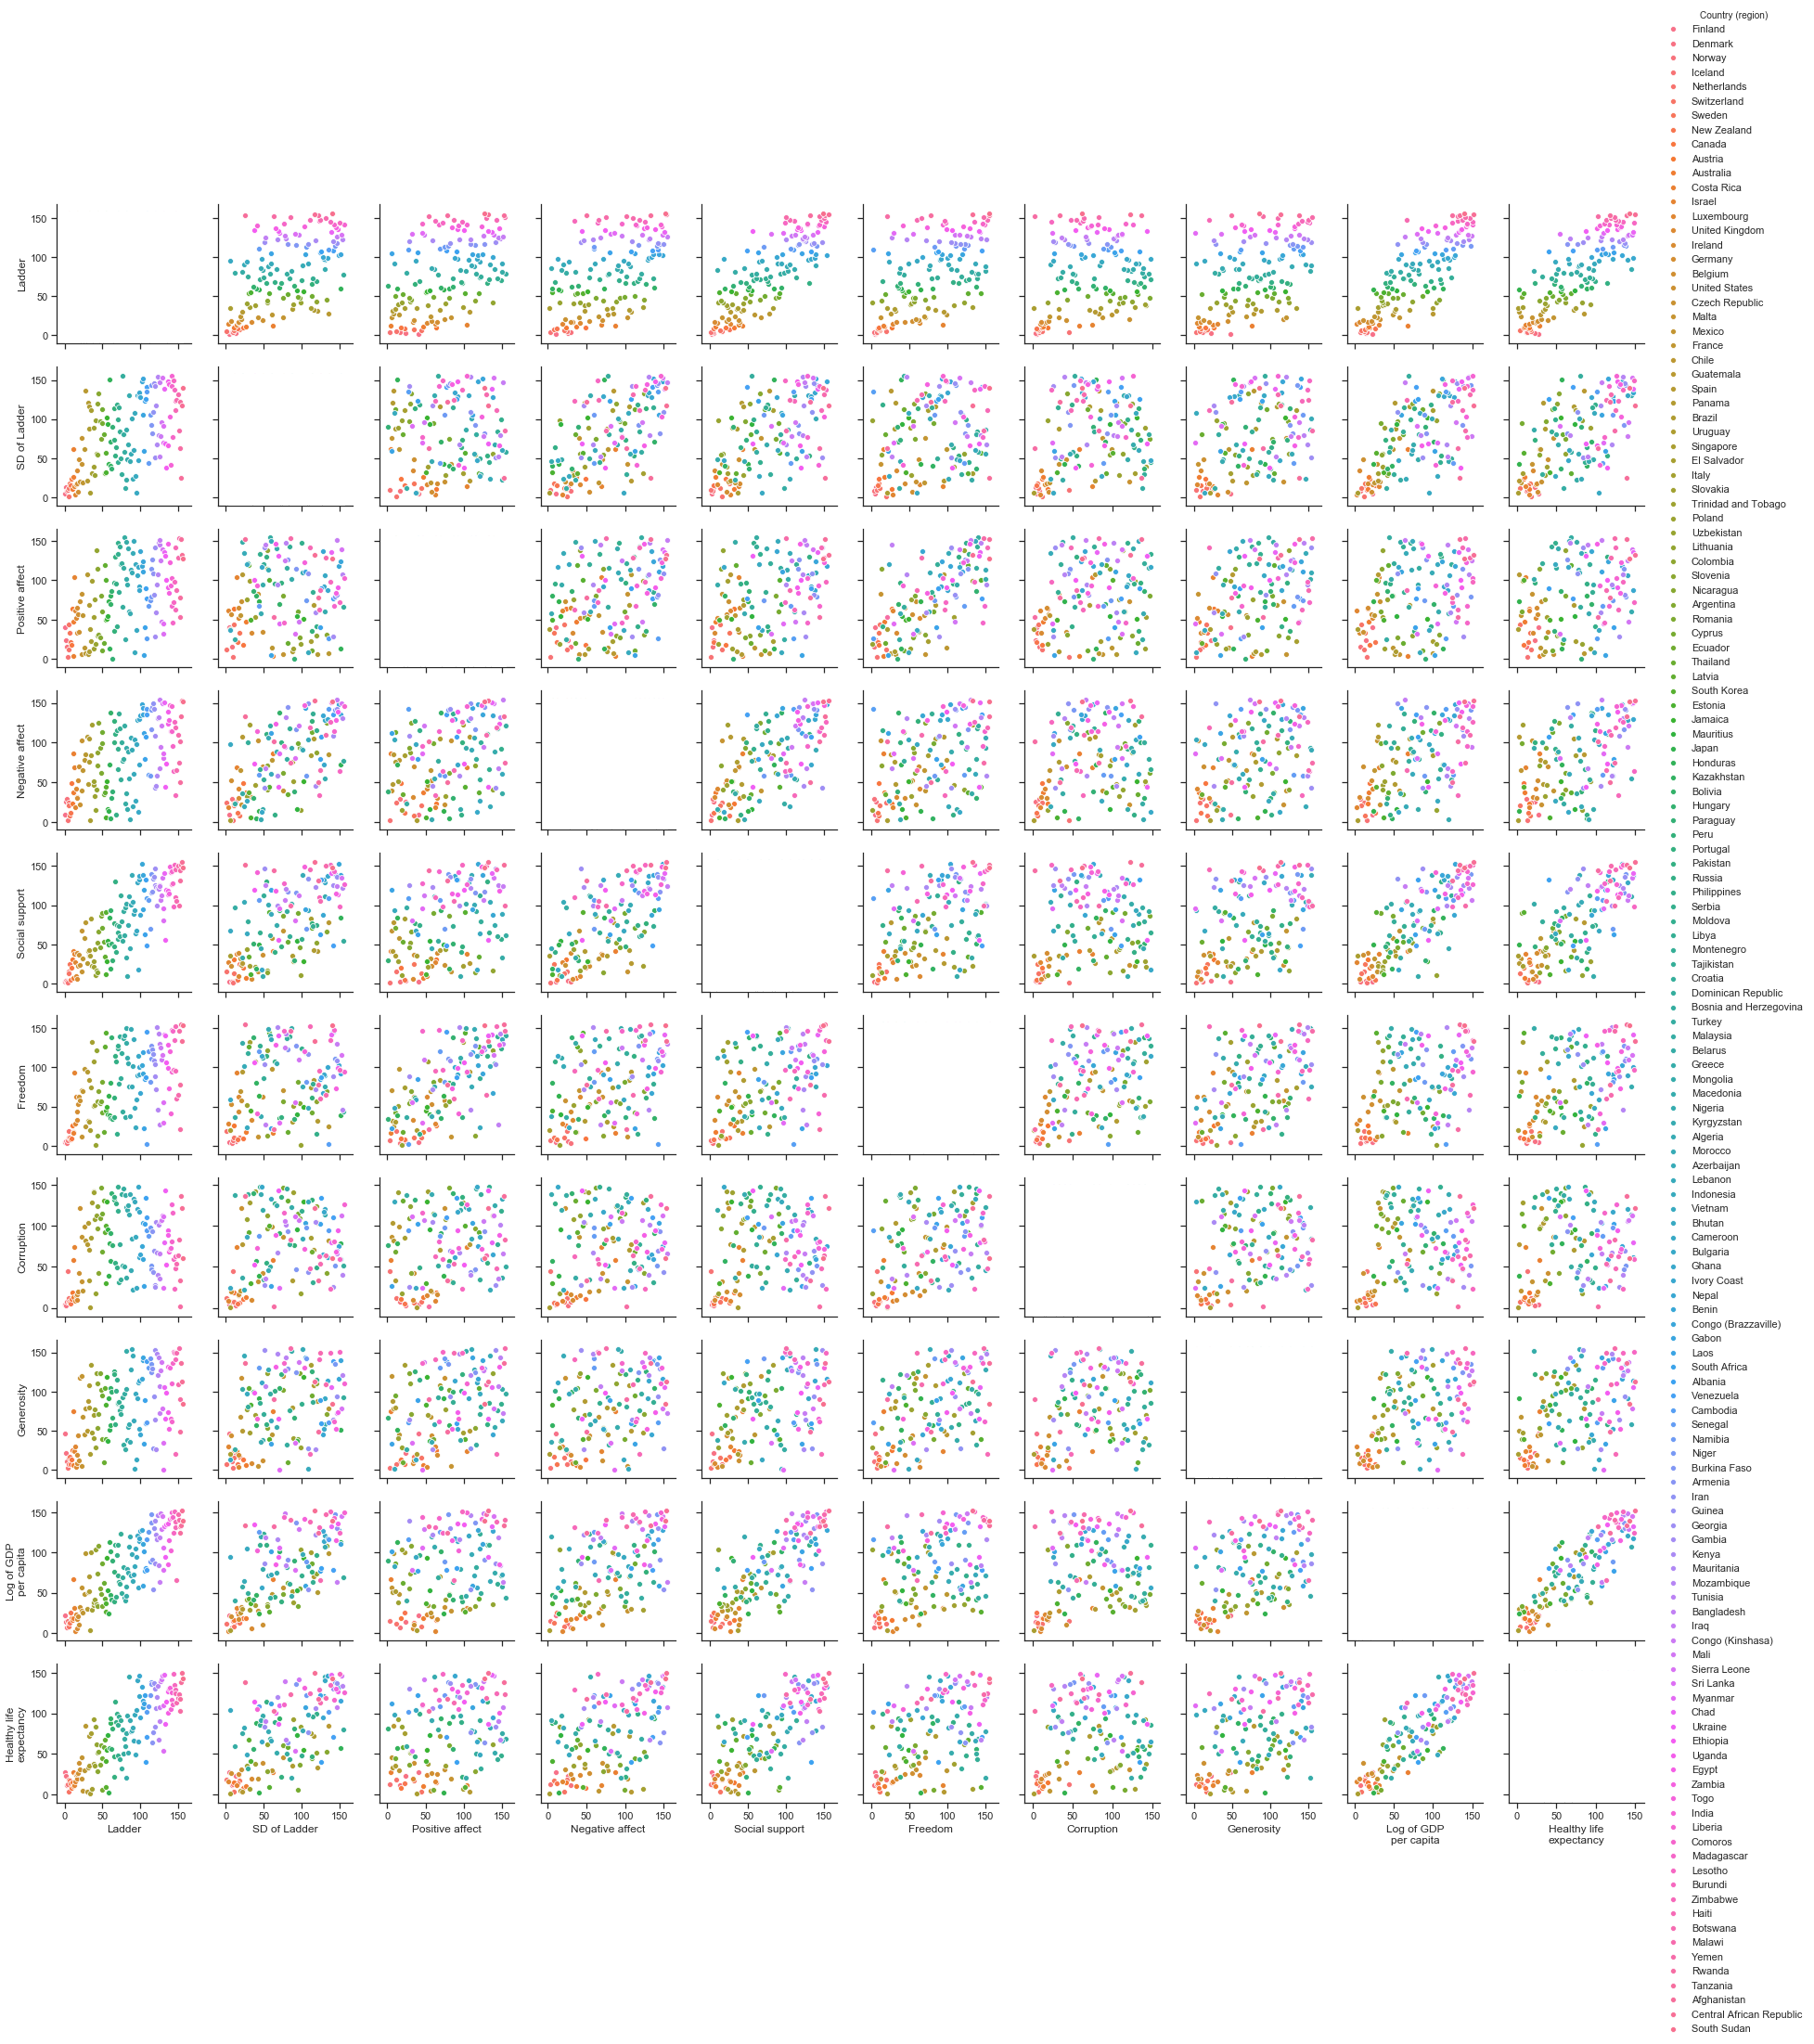

In [70]:
# Если код ниже не работает, измените код, используя материал лекций. Пишите на почту, если испытываете проблемы: yustiks@gmail.com
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data=data_d, hue='Country (region)', diag_kind='hist')
plt.show()

Посчитать матрицу корреляций для таблицы. Написать код. Сделать график. Какие можно сделать выводы?

In [103]:
# Нормализует значения data_d и построим матрицу корреляции
data_d.corr()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
Ladder,1.000000,0.555987,0.511870,0.539677,0.833412,0.546414,0.224394,0.485704,0.820608,0.826677
SD of Ladder,0.555987,1.000000,0.090332,0.632734,0.600087,0.250246,0.253344,0.386337,0.663977,0.637554
Positive affect,0.511870,0.090332,1.000000,0.351906,0.433333,0.696567,0.225905,0.417061,0.310843,0.339032
Negative affect,0.539677,0.632734,0.351906,1.000000,0.671387,0.415935,0.166472,0.350541,0.565756,0.507148
Social support,0.833412,0.600087,0.433333,0.671387,1.000000,0.478613,0.148890,0.448135,0.801898,0.755292
Freedom,0.546414,0.250246,0.696567,0.415935,0.478613,1.000000,0.407571,0.498226,0.385919,0.423949
Corruption,0.224394,0.253344,0.225905,0.166472,0.148890,0.407571,1.000000,0.281146,0.186140,0.148973
Generosity,0.485704,0.386337,0.417061,0.350541,0.448135,0.498226,0.281146,1.000000,0.459762,0.453135
Log of GDP\nper capita,0.820608,0.663977,0.310843,0.565756,0.801898,0.385919,0.186140,0.459762,1.000000,0.873628
Healthy life\nexpectancy,0.826677,0.637554,0.339032,0.507148,0.755292,0.423949,0.148973,0.453135,0.873628,1.000000


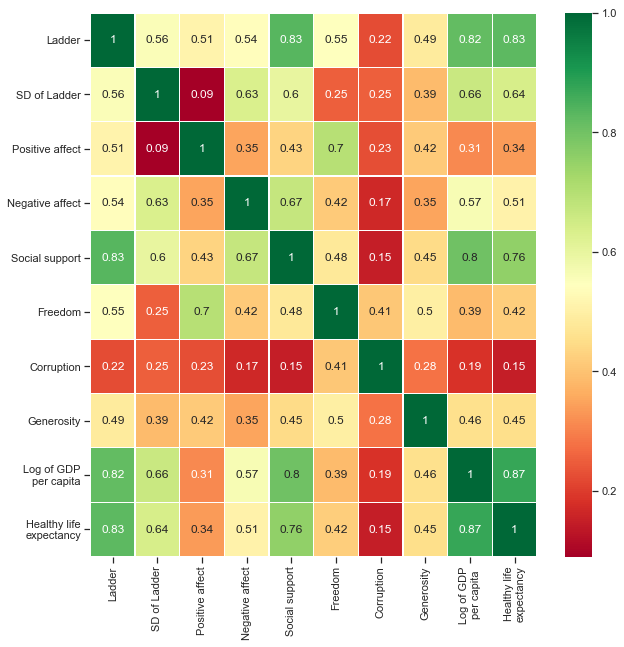

In [101]:
sns.heatmap(data_d.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

**Вывод:** по графику мартицы корреляции, можно проследить наибольшую связь значений, в ячейках которых приближены к 0.8 и выше.

(Чем выше коэф. тем ярче зеленый цвет)

In [12]:
# Проверим через коварриацию .corr() построенный выше

X = data_d.iloc[:,1:]

np.cov(X)
# print(np.shape(np.cov(X)))

np.cov(X.T)
# print(np.shape(np.cov(X.T)))

standardized = (X - X.mean()) / X.std()
np.around(np.cov(standardized.T), 2)

array([[1.  , 0.56, 0.51, 0.54, 0.83, 0.55, 0.22, 0.49, 0.82, 0.83],
       [0.56, 1.  , 0.09, 0.63, 0.6 , 0.25, 0.25, 0.39, 0.66, 0.64],
       [0.51, 0.09, 1.  , 0.35, 0.43, 0.7 , 0.23, 0.42, 0.31, 0.34],
       [0.54, 0.63, 0.35, 1.  , 0.67, 0.42, 0.17, 0.35, 0.57, 0.51],
       [0.83, 0.6 , 0.43, 0.67, 1.  , 0.48, 0.15, 0.45, 0.8 , 0.76],
       [0.55, 0.25, 0.7 , 0.42, 0.48, 1.  , 0.41, 0.5 , 0.39, 0.42],
       [0.22, 0.25, 0.23, 0.17, 0.15, 0.41, 1.  , 0.28, 0.19, 0.15],
       [0.49, 0.39, 0.42, 0.35, 0.45, 0.5 , 0.28, 1.  , 0.46, 0.45],
       [0.82, 0.66, 0.31, 0.57, 0.8 , 0.39, 0.19, 0.46, 1.  , 0.87],
       [0.83, 0.64, 0.34, 0.51, 0.76, 0.42, 0.15, 0.45, 0.87, 1.  ]])

In [152]:
# корреляция не зависит от нормирования данных

**Регрессионный анализ** - можно ли провести линейную зависимость между двумя выборками. Возьмем Ladder - удовлетворение жизнью, и generosity - доброта. Мы хотим найти прямую, которая разделит точки в пространстве наполовину. Это можно сделать графически. Нарисовать график. Можно ли сказать, что данная прямая является собственным вектором? При проецировании данных на эту прямую разброс данных максимален?

Собственное значение:  3038.36 Собственный вектор:  [0.72258657 0.69128044]


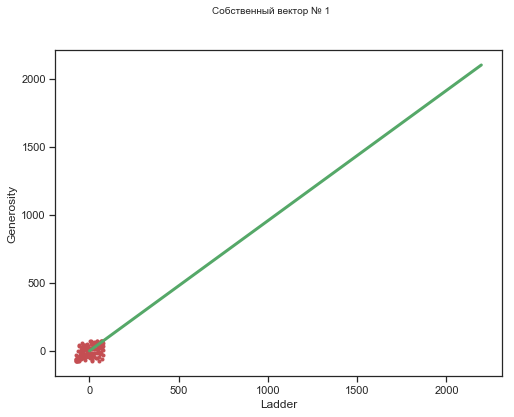

Собственное значение:  1050.77 Собственный вектор:  [-0.69128044  0.72258657]


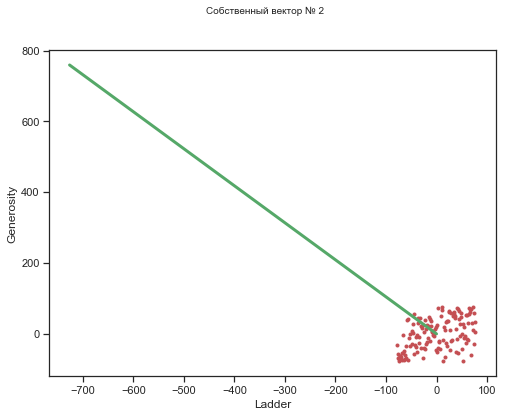

In [167]:
import numpy.linalg as la
import math
from sklearn.preprocessing import StandardScaler
import statistics
from scipy.stats import pearsonr

from pylab import rcParams
rcParams['figure.figsize'] = 8,6

petal_length = data_d['Ladder']
petal_width = data_d['Generosity']

mean1 = statistics.mean(petal_length)
petal_length -= mean1

mean2 = statistics.mean(petal_width)
petal_width -= mean2

Y = np.vstack((petal_length, petal_width)).T
w,v = la.eig(np.cov(Y.T))

for i in range(len(w)):
    plt.suptitle('Собственный вектор № '+ str(i+1), fontsize=10)    
    plt.plot(petal_length, petal_width, 'r.', zorder=1)
    print('Собственное значение: ', round(w[i],2), 'Собственный вектор: ', v[:,i])
    plt.xlabel('Ladder')
    plt.ylabel('Generosity')
    plt.plot([mean1, mean1+w[i]*v[:,i][0]], [mean2, mean2 +w[i] * v[:,i][1]],color='g', linewidth=3)
    plt.show()

Очень длинные собственные вектора почему-то, длина вектор показывает насколько растянута выборка в данном направлении.

In [221]:
# from scipy.stats import pearsonr
# from sklearn import preprocessing

# min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

# np_scaled = min_max_scaler.fit_transform(data_d[['Ladder', 'Generosity']])
# df_norm = pd.DataFrame(np_scaled)

# volume = df_norm[0]
# bags = df_norm[1]

# # plt.plot(volume, bags, 'r.')
# # plt.show()

# sns.jointplot(x=volume, y=bags, 
#               data=df_norm, kind='reg')

In [222]:
# corr, p_value = pearsonr(volume, bags)
# print(corr)

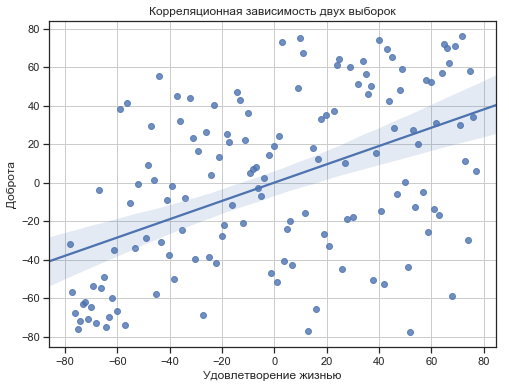

0.48570397345117283

In [241]:
ladder = data_d['Ladder']
generosity = data_d['Generosity']
sns.regplot(x= ladder, y=generosity,data=data_d, fit_reg=True)
plt.xlabel('Удовлетворение жизнью')
plt.ylabel('Доброта')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(True)
plt.show()

corr, value = pearsonr(ladder, generosity)
corr

Можно ли сказать, что данная прямая является собственным вектором? - Скорее всего нет т.к. она просто делит пополам

При проецировании данных на эту прямую разброс данных максимален? - Минимален - минимально расстояние от точек до прямой, максимален разброс

Корреляция regplot с добавлением регрессионного анализа. Линейная регрессия - нахождение прямой, которая описывает корреляцию между двумя переменными наилучшим образом (сумма расстояний от каждого элемента до прямой минимальна). В данном случае получается зависимость двух переменных: чем больше 'Удовлетворенности жизни', тем больше 'Доброты'.

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

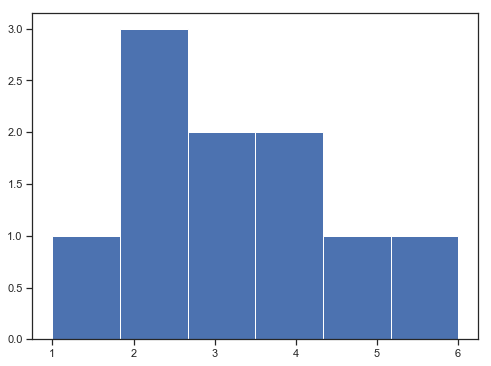

In [201]:
x_10 = np.random.randint(low=1, high=7, size=10)
# print(x_10)
plt.hist(x_10, bins=6)
plt.show()

In [ ]:
# Какое это распределение? - Дискретное распределение случайной велечины

Напишите код для моделирования 1000 подбрасываний игрального кубика. Начертите диаграму histogram. Почему график изменился? Как применить центральную предельную теорему?

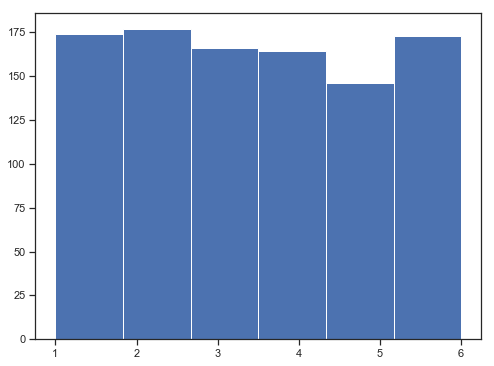

In [214]:
x_1000 = np.random.randint(low=1, high=7, size=1000)
plt.hist(x_1000, bins=6)
plt.show()

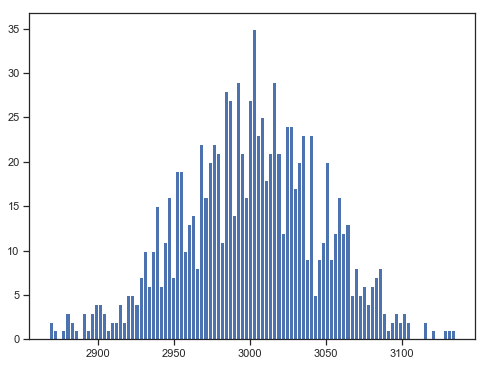

In [219]:
from numpy.random import randint

sampleMeans = []

for _ in range(1000):
  # 1000 элементов, значение которых от 1 до 6
    sampleMean = sum(randint(1, 6, 1000))
    sampleMeans.append(sampleMean)

# если построим график - можно увидеть нормальное распределение
plt.hist(sampleMeans, 100)
plt.show()

Какое это распределение? - Дискретное распределение случайной велечины

Почему график изменился? - Увеличилось число подбрасываний, происходит сглаживание из-за большого колличества бросков

Как применить центральную предельную теорему? При генерации 1000 элементов график стремится к "Нормальному распределению"

In [ ]:
pass